## 1. Import Libraries

In [498]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from functools import reduce

# Feature selection and data splitting
from sklearn import feature_selection
from sklearn.model_selection import train_test_split

# ML regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate

# Regression performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Increase maximum columns displayed by pandas
pd.options.display.max_columns = 100

## 2. Load Data

### 2.1  Emissions by Link
- LAEI2013_MajorRoads_EmissionsbyLink_2013.xlsx
    - Sheets: 2013 LTS Rds and 2013 Other Major Rds

In [3]:
%%time

df_2013_EmissionsbyLink = pd.read_excel("LAEI2013_MajorRoads_EmissionsbyLink_2013.xlsx", sheet_name=[0, 1])

# The above file contains two sheets
df_2013_LTS_Rds = df_2013_EmissionsbyLink[0]
df_2013_Other_Major_Rds = df_2013_EmissionsbyLink[1]

print(df_2013_LTS_Rds.shape)
print(df_2013_Other_Major_Rds.shape)

# Add the sheet name in a new column to differentiate between LTS and Other Major Roads
df_2013_LTS_Rds["EmissinsbyLink_sheet"] = "LTS_Rds"
df_2013_Other_Major_Rds["EmissinsbyLink_sheet"] = "Other_Major_Rds"

(366220, 32)
(513740, 32)
Wall time: 3min 58s


In [5]:
df_2013_LTS_Rds.columns

Index(['GridId', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'Lts', 'Length (m)', 'Emissions', 'Year',
       'Pollutant', 'Emissions Unit', 'Motorcycle', 'Taxi', 'Car',
       'BusAndCoach', 'Lgv', 'Rigid', 'Artic', 'Rigid2Axle', 'Rigid3Axle',
       'Rigid4Axle', 'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar',
       'DieselCar', 'PetrolLgv', 'DieselLgv', 'LtBus', 'Coach', 'ElectricCar',
       'ElectricLgv', 'EmissinsbyLink_sheet'],
      dtype='object')

In [6]:
df_2013_Other_Major_Rds.columns

# Lts (for LTS_Rds) vs. DotRef (for Other_Major_Rds)

Index(['GridId', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'DotRef', 'Length (m)', 'Emissions', 'Year',
       'Pollutant', 'Emissions Unit', 'Motorcycle', 'Taxi', 'Car',
       'BusAndCoach', 'Lgv', 'Rigid', 'Artic', 'Rigid2Axle', 'Rigid3Axle',
       'Rigid4Axle', 'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar',
       'DieselCar', 'PetrolLgv', 'DieselLgv', 'LtBus', 'Coach', 'ElectricCar',
       'ElectricLgv', 'EmissinsbyLink_sheet'],
      dtype='object')

In [7]:
df_2013_LTS_Rds.head()

,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Lts,Length (m),Emissions,Year,Pollutant,Emissions Unit,Motorcycle,Taxi,Car,BusAndCoach,Lgv,Rigid,Artic,Rigid2Axle,Rigid3Axle,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv,EmissinsbyLink_sheet
0,6253,4000000027908919,24,External,NonGLA,18898,50.761449,DFT,2013,CO2,tonnes/year,0.158290,0.374854,13.572217,0.0,1.772671,1.538737,0.609006,1.045237,0.178038,0.315462,0.177074,0.241372,0.190560,8.761443,4.810774,0.037550,1.735121,0.0,0.0,0.0,0.0,LTS_Rds
1,6253,4000000027947931,24,External,NonGLA,18895,28.592125,DFT,2013,CO2,tonnes/year,0.000000,0.000000,0.024111,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015535,0.008576,0.000000,0.000000,0.0,0.0,0.0,0.0,LTS_Rds
2,6253,4000000028013383,24,External,NonGLA,15816,5.101391,DFT,2013,CO2,tonnes/year,0.016974,0.039540,1.457712,0.0,0.188471,0.169197,0.068765,0.114091,0.020032,0.035074,0.019985,0.027271,0.021509,0.939028,0.518684,0.004055,0.184415,0.0,0.0,0.0,0.0,LTS_Rds
3,6253,4000000028025820,24,External,NonGLA,15816,3.757501,DFT,2013,CO2,tonnes/year,0.012503,0.029124,1.073698,0.0,0.138821,0.124625,0.050650,0.084036,0.014755,0.025834,0.014720,0.020087,0.015843,0.691654,0.382044,0.002987,0.135834,0.0,0.0,0.0,0.0,LTS_Rds
4,6253,4000000028029388,24,External,NonGLA,15816,1.624593,DFT,2013,CO2,tonnes/year,0.005406,0.012592,0.464224,0.0,0.060020,0.053883,0.021899,0.036334,0.006379,0.011170,0.006365,0.008685,0.006850,0.299044,0.165180,0.001292,0.058729,0.0,0.0,0.0,0.0,LTS_Rds


In [8]:
df_2013_Other_Major_Rds.head()

,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,DotRef,Length (m),Emissions,Year,Pollutant,Emissions Unit,Motorcycle,Taxi,Car,BusAndCoach,Lgv,Rigid,Artic,Rigid2Axle,Rigid3Axle,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv,EmissinsbyLink_sheet
0,5911,4000000027989878,2,External,NonGLA,28440,9.714495,DFT,2013,CO2,tonne/year,0.109479,0.489228,38.421925,0.744254,11.284972,6.154057,16.431225,3.693680,1.346705,1.113672,0.875312,3.006694,12.549219,18.791658,19.630267,0.279151,11.005820,0.000000,0.744254,0.0,0.0,Other_Major_Rds
1,5911,4000000027989880,2,External,NonGLA,28440,0.000000,DFT,2013,CO2,tonne/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Other_Major_Rds
2,5911,4000000027989882,2,External,NonGLA,57226,8.577192,DFT,2013,CO2,tonne/year,0.206466,0.365668,29.778628,1.623398,7.854346,3.257626,3.673683,1.737763,0.563588,0.956275,0.466739,0.760333,2.446611,19.478135,10.300493,0.120149,7.734197,0.754408,0.868990,0.0,0.0,Other_Major_Rds
3,5911,4000000028014332,2,External,NonGLA,57226,9.347936,DFT,2013,CO2,tonne/year,0.203719,0.349104,30.727094,1.717707,7.542684,3.523312,3.977384,1.871444,0.612446,1.039422,0.505633,0.823130,2.648621,20.173154,10.553940,0.123945,7.418739,0.820669,0.897038,0.0,0.0,Other_Major_Rds
4,5911,4000000027888882,2,External,NonGLA,28440,0.000000,DFT,2013,CO2,tonne/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Other_Major_Rds


#### 2.1.1 Concatenante the two sheets into one dataframe

In [9]:
%%time 
df_merged_EmissionsbyLink = pd.concat([df_2013_LTS_Rds, df_2013_Other_Major_Rds])

print(df_merged_EmissionsbyLink.shape)

(879960, 34)
Wall time: 187 ms


In [10]:
df_merged_EmissionsbyLink.columns

Index(['GridId', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'Lts', 'Length (m)', 'Emissions', 'Year',
       'Pollutant', 'Emissions Unit', 'Motorcycle', 'Taxi', 'Car',
       'BusAndCoach', 'Lgv', 'Rigid', 'Artic', 'Rigid2Axle', 'Rigid3Axle',
       'Rigid4Axle', 'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar',
       'DieselCar', 'PetrolLgv', 'DieselLgv', 'LtBus', 'Coach', 'ElectricCar',
       'ElectricLgv', 'EmissinsbyLink_sheet', 'DotRef'],
      dtype='object')

In [11]:
df_merged_EmissionsbyLink.head()

,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Lts,Length (m),Emissions,Year,Pollutant,Emissions Unit,Motorcycle,Taxi,Car,BusAndCoach,Lgv,Rigid,Artic,Rigid2Axle,Rigid3Axle,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv,EmissinsbyLink_sheet,DotRef
0,6253,4000000027908919,24,External,NonGLA,18898.0,50.761449,DFT,2013,CO2,tonnes/year,0.158290,0.374854,13.572217,0.0,1.772671,1.538737,0.609006,1.045237,0.178038,0.315462,0.177074,0.241372,0.190560,8.761443,4.810774,0.037550,1.735121,0.0,0.0,0.0,0.0,LTS_Rds,NaN
1,6253,4000000027947931,24,External,NonGLA,18895.0,28.592125,DFT,2013,CO2,tonnes/year,0.000000,0.000000,0.024111,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015535,0.008576,0.000000,0.000000,0.0,0.0,0.0,0.0,LTS_Rds,NaN
2,6253,4000000028013383,24,External,NonGLA,15816.0,5.101391,DFT,2013,CO2,tonnes/year,0.016974,0.039540,1.457712,0.0,0.188471,0.169197,0.068765,0.114091,0.020032,0.035074,0.019985,0.027271,0.021509,0.939028,0.518684,0.004055,0.184415,0.0,0.0,0.0,0.0,LTS_Rds,NaN
3,6253,4000000028025820,24,External,NonGLA,15816.0,3.757501,DFT,2013,CO2,tonnes/year,0.012503,0.029124,1.073698,0.0,0.138821,0.124625,0.050650,0.084036,0.014755,0.025834,0.014720,0.020087,0.015843,0.691654,0.382044,0.002987,0.135834,0.0,0.0,0.0,0.0,LTS_Rds,NaN
4,6253,4000000028029388,24,External,NonGLA,15816.0,1.624593,DFT,2013,CO2,tonnes/year,0.005406,0.012592,0.464224,0.0,0.060020,0.053883,0.021899,0.036334,0.006379,0.011170,0.006365,0.008685,0.006850,0.299044,0.165180,0.001292,0.058729,0.0,0.0,0.0,0.0,LTS_Rds,NaN


In [27]:
columns_to_sum = ['Motorcycle', 'Taxi', 'Car', 'BusAndCoach', 'Lgv', 'Rigid', 'Artic', 'Rigid2Axle', 'Rigid3Axle', 
                  'Rigid4Axle', 'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar', 'DieselCar', 'PetrolLgv',
                  'DieselLgv', 'LtBus', 'Coach', 'ElectricCar', 'ElectricLgv']

# Add a new column for the total emissions calculated from the above columns
df_merged_EmissionsbyLink["total_emissions"] = df_merged_EmissionsbyLink[columns_to_sum].sum(axis=1)

In [367]:
df_merged_EmissionsbyLink.head()

,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Lts,Length (m),Emissions,Year,Pollutant,Emissions Unit,Motorcycle,Taxi,Car,BusAndCoach,Lgv,Rigid,Artic,Rigid2Axle,Rigid3Axle,Rigid4Axle,Artic3Axle,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv,EmissinsbyLink_sheet,DotRef,total_emissions
0,6253,4000000027908919,24,External,NonGLA,18898.0,50.761449,DFT,2013,CO2,tonnes/year,0.158290,0.374854,13.572217,0.0,1.772671,1.538737,0.609006,1.045237,0.178038,0.315462,0.177074,0.241372,0.190560,8.761443,4.810774,0.037550,1.735121,0.0,0.0,0.0,0.0,LTS_Rds,NaN,35.518405
1,6253,4000000027947931,24,External,NonGLA,18895.0,28.592125,DFT,2013,CO2,tonnes/year,0.000000,0.000000,0.024111,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015535,0.008576,0.000000,0.000000,0.0,0.0,0.0,0.0,LTS_Rds,NaN,0.048222
2,6253,4000000028013383,24,External,NonGLA,15816.0,5.101391,DFT,2013,CO2,tonnes/year,0.016974,0.039540,1.457712,0.0,0.188471,0.169197,0.068765,0.114091,0.020032,0.035074,0.019985,0.027271,0.021509,0.939028,0.518684,0.004055,0.184415,0.0,0.0,0.0,0.0,LTS_Rds,NaN,3.824804
3,6253,4000000028025820,24,External,NonGLA,15816.0,3.757501,DFT,2013,CO2,tonnes/year,0.012503,0.029124,1.073698,0.0,0.138821,0.124625,0.050650,0.084036,0.014755,0.025834,0.014720,0.020087,0.015843,0.691654,0.382044,0.002987,0.135834,0.0,0.0,0.0,0.0,LTS_Rds,NaN,2.817213
4,6253,4000000028029388,24,External,NonGLA,15816.0,1.624593,DFT,2013,CO2,tonnes/year,0.005406,0.012592,0.464224,0.0,0.060020,0.053883,0.021899,0.036334,0.006379,0.011170,0.006365,0.008685,0.006850,0.299044,0.165180,0.001292,0.058729,0.0,0.0,0.0,0.0,LTS_Rds,NaN,1.218050


#### 2.1.2 Pivot the Pollutants column to have a single record per Toid (Link ID)

In [403]:
%%time

pivot_index = ['GridId', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut', 'BoroughName_ExactCut', 'Lts', 'Length (m)',
               'Year', 'DotRef', 'EmissinsbyLink_sheet']

pivot_columns = "Pollutant"

pivot_values = ['Motorcycle', 'Taxi', 'Car', 'BusAndCoach', 'Lgv', 'Rigid', 'Artic', 'Rigid2Axle', 'Rigid3Axle',
                'Rigid4Axle', 'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar', 'DieselCar', 'PetrolLgv', 'DieselLgv',
                'LtBus', 'Coach', 'ElectricCar', 'ElectricLgv', 'total_emissions']

df_merged_EmissionsbyLink_pivoted = df_merged_EmissionsbyLink.pivot(index=pivot_index, columns=pivot_columns, values=pivot_values)

print(df_merged_EmissionsbyLink_pivoted.shape)

(87996, 220)
Wall time: 1.03 s


In [404]:
df_merged_EmissionsbyLink_pivoted.head()

Motorcycle  \
Pollutant                                                                                                                               CO2   
GridId Toid             GRID_ExactCut_ID Location_ExactCut BoroughName_ExactCut Lts Length (m) Year DotRef  EmissinsbyLink_sheet              
5911   4000000027866319 2                External          NonGLA               NaN 9.496804   2013 7903.0  Other_Major_Rds        0.264360   
       4000000027866410 2                External          NonGLA               NaN 80.458276  2013 57226.0 Other_Major_Rds        1.788469   
       4000000027866411 2                External          NonGLA               NaN 89.630074  2013 57226.0 Other_Major_Rds        2.052965   
       4000000027869370 2                External          NonGLA               NaN 0.000000   2013 7903.0  Other_Major_Rds        0.000000   
       4000000027869374 2                External          NonGLA               NaN 316.434035 2013 7903.0  Other_Major_Rds        9.290549   

                                                                                                                                            \
Pollutant                                                                                                                              NOx   
GridId Toid             GRID_ExactCut_ID Location_ExactCut BoroughName_ExactCut Lts Length (m) Year DotRef  EmissinsbyLink_sheet             
5911   4000000027866319 2                External          NonGLA               NaN 9.496804   2013 7903.0  Other_Major_Rds       0.000679   
       4000000027866410 2                External          NonGLA               NaN 80.458276  2013 57226.0 Other_Major_Rds       0.005104   
       4000000027866411 2                External          NonGLA               NaN 89.630074  2013 57226.0 Other_Major_Rds       0.006118   
       4000000027869370 2                External          NonGLA               NaN 0.000000   2013 7903.0  Other_Major_Rds       0.000000   
       4000000027869374 2                External          NonGLA               NaN 316.434035 2013 7903.0  Other_Major_Rds       0.025989   

                                                                                                                                             \
Pollutant                                                                                                                        PM10_Brake   
GridId Toid             GRID_ExactCut_ID Location_ExactCut BoroughName_ExactCut Lts Length (m) Year DotRef  EmissinsbyLink_sheet              
5911   4000000027866319 2                External          NonGLA               NaN 9.496804   2013 7903.0  Other_Major_Rds        0.000005   
       4000000027866410 2                External          NonGLA               NaN 80.458276  2013 57226.0 Other_Major_Rds        0.000070   
       4000000027866411 2                External          NonGLA               NaN 89.630074  2013 57226.0 Other_Major_Rds        0.000045   
       4000000027869370 2                External          NonGLA               NaN 0.000000   2013 7903.0  Other_Major_Rds        0.000000   
       4000000027869374 2                External          NonGLA               NaN 316.434035 2013 7903.0  Other_Major_Rds        0.000154   

                                                                                                                                               \
Pollutant                                                                                                                        PM10_Exhaust   
GridId Toid             GRID_ExactCut_ID Location_ExactCut BoroughName_ExactCut Lts Length (m) Year DotRef  EmissinsbyLink_sheet                
5911   4000000027866319 2                External          NonGLA               NaN 9.496804   2013 7903.0  Other_Major_Rds          0.000019   
       4000000027866410 2                External          NonGLA               NaN 80.458276  2013 57226.0 Other_Major_Rd

In [405]:
df_merged_EmissionsbyLink_pivoted.reset_index().columns

MultiIndex([(              'GridId',             ''),
            (                'Toid',             ''),
            (    'GRID_ExactCut_ID',             ''),
            (   'Location_ExactCut',             ''),
            ('BoroughName_ExactCut',             ''),
            (                 'Lts',             ''),
            (          'Length (m)',             ''),
            (                'Year',             ''),
            (              'DotRef',             ''),
            ('EmissinsbyLink_sheet',             ''),
            ...
            (     'total_emissions',          'CO2'),
            (     'total_emissions',          'NOx'),
            (     'total_emissions',   'PM10_Brake'),
            (     'total_emissions', 'PM10_Exhaust'),
            (     'total_emissions',  'PM10_Resusp'),
            (     'total_emissions',    'PM10_Tyre'),
            (     'total_emissions',   'PM25_Brake'),
            (     'total_emissions', 'PM25_Exhaust'),
            

In [398]:
df_merged_EmissionsbyLink_pivoted.columns

MultiIndex([(     'Motorcycle',          'CO2'),
            (     'Motorcycle',          'NOx'),
            (     'Motorcycle',   'PM10_Brake'),
            (     'Motorcycle', 'PM10_Exhaust'),
            (     'Motorcycle',  'PM10_Resusp'),
            (     'Motorcycle',    'PM10_Tyre'),
            (     'Motorcycle',   'PM25_Brake'),
            (     'Motorcycle', 'PM25_Exhaust'),
            (     'Motorcycle',  'PM25_Resusp'),
            (     'Motorcycle',    'PM25_Tyre'),
            ...
            ('total_emissions',          'CO2'),
            ('total_emissions',          'NOx'),
            ('total_emissions',   'PM10_Brake'),
            ('total_emissions', 'PM10_Exhaust'),
            ('total_emissions',  'PM10_Resusp'),
            ('total_emissions',    'PM10_Tyre'),
            ('total_emissions',   'PM25_Brake'),
            ('total_emissions', 'PM25_Exhaust'),
            ('total_emissions',  'PM25_Resusp'),
            ('total_emissions',    'PM25_Tyre')],
   

#### 2.1.3 Update column names

In [406]:
df_merged_EmissionsbyLink_pivoted.reset_index(inplace=True)

# Update columns names to be all strings (some columns names were in tuples after pivoting the pollutant column)
df_merged_EmissionsbyLink_pivoted.columns = ['_'.join(x) if (type(x) == tuple and x[1] != '') else x[0] for x in df_merged_EmissionsbyLink_pivoted.columns]

# Lower-case, replace spaces, and strip whitespace from the column names
df_merged_EmissionsbyLink_pivoted.columns = df_merged_EmissionsbyLink_pivoted.columns.str.replace(" ", "_").str.lower().str.strip()

# Add prefix ebl_ to identify the source of the data from the column name (ebl = Emissions by Link)
df_merged_EmissionsbyLink_pivoted = df_merged_EmissionsbyLink_pivoted.add_prefix("ebl_")

In [407]:
df_merged_EmissionsbyLink_pivoted.head()

,ebl_gridid,ebl_toid,ebl_grid_exactcut_id,ebl_location_exactcut,ebl_boroughname_exactcut,ebl_lts,ebl_length_(m),ebl_year,ebl_dotref,ebl_emissinsbylink_sheet,ebl_motorcycle_co2,ebl_motorcycle_nox,ebl_motorcycle_pm10_brake,ebl_motorcycle_pm10_exhaust,ebl_motorcycle_pm10_resusp,ebl_motorcycle_pm10_tyre,ebl_motorcycle_pm25_brake,ebl_motorcycle_pm25_exhaust,ebl_motorcycle_pm25_resusp,ebl_motorcycle_pm25_tyre,ebl_taxi_co2,ebl_taxi_nox,ebl_taxi_pm10_brake,ebl_taxi_pm10_exhaust,ebl_taxi_pm10_resusp,ebl_taxi_pm10_tyre,ebl_taxi_pm25_brake,ebl_taxi_pm25_exhaust,ebl_taxi_pm25_resusp,ebl_taxi_pm25_tyre,ebl_car_co2,ebl_car_nox,ebl_car_pm10_brake,ebl_car_pm10_exhaust,ebl_car_pm10_resusp,ebl_car_pm10_tyre,ebl_car_pm25_brake,ebl_car_pm25_exhaust,ebl_car_pm25_resusp,ebl_car_pm25_tyre,ebl_busandcoach_co2,ebl_busandcoach_nox,ebl_busandcoach_pm10_brake,ebl_busandcoach_pm10_exhaust,ebl_busandcoach_pm10_resusp,ebl_busandcoach_pm10_tyre,ebl_busandcoach_pm25_brake,ebl_busandcoach_pm25_exhaust,ebl_busandcoach_pm25_resusp,ebl_busandcoach_pm25_tyre,...,ebl_ltbus_co2,ebl_ltbus_nox,ebl_ltbus_pm10_brake,ebl_ltbus_pm10_exhaust,ebl_ltbus_pm10_resusp,ebl_ltbus_pm10_tyre,ebl_ltbus_pm25_brake,ebl_ltbus_pm25_exhaust,ebl_ltbus_pm25_resusp,ebl_ltbus_pm25_tyre,ebl_coach_co2,ebl_coach_nox,ebl_coach_pm10_brake,ebl_coach_pm10_exhaust,ebl_coach_pm10_resusp,ebl_coach_pm10_tyre,ebl_coach_pm25_brake,ebl_coach_pm25_exhaust,ebl_coach_pm25_resusp,ebl_coach_pm25_tyre,ebl_electriccar_co2,ebl_electriccar_nox,ebl_electriccar_pm10_brake,ebl_electriccar_pm10_exhaust,ebl_electriccar_pm10_resusp,ebl_electriccar_pm10_tyre,ebl_electriccar_pm25_brake,ebl_electriccar_pm25_exhaust,ebl_electriccar_pm25_resusp,ebl_electriccar_pm25_tyre,ebl_electriclgv_co2,ebl_electriclgv_nox,ebl_electriclgv_pm10_brake,ebl_electriclgv_pm10_exhaust,ebl_electriclgv_pm10_resusp,ebl_electriclgv_pm10_tyre,ebl_electriclgv_pm25_brake,ebl_electriclgv_pm25_exhaust,ebl_electriclgv_pm25_resusp,ebl_electriclgv_pm25_tyre,ebl_total_emissions_co2,ebl_total_emissions_nox,ebl_total_emissions_pm10_brake,ebl_total_emissions_pm10_exhaust,ebl_total_emissions_pm10_resusp,ebl_total_emissions_pm10_tyre,ebl_total_emissions_pm25_brake,ebl_total_emissions_pm25_exhaust,ebl_total_emissions_pm25_resusp,ebl_total_emissions_pm25_tyre
0,5911,4000000027866319,2,External,NonGLA,NaN,9.496804,2013,7903.0,Other_Major_Rds,0.264360,0.000679,0.000005,0.000019,0.0,0.000005,0.000002,0.000018,0.0,0.000004,0.741443,0.002551,0.000013,0.000191,0.000019,0.000016,0.000005,0.000181,7.762953e-07,0.000011,58.402257,0.153804,0.002147,0.003739,0.003111,0.002512,0.000854,0.003552,0.000124,0.001758,1.177682,0.005374,0.000034,0.000086,0.000633,0.000019,0.000013,0.000082,0.000023,0.000013,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.177682,0.005374,0.000034,0.000086,0.000633,0.000019,0.000013,0.000082,0.000023,0.000013,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,216.161524,0.627276,0.007250,0.016008,0.042972,0.008434,0.002885,0.015207,0.001576,0.005904
1,5911,4000000027866410,2,External,NonGLA,NaN,80.458276,2013,57226.0,Other_Major_Rds,1.788469,0.005104,0.000070,0.000215,0.0,0.000046,0.000028,0.000205,0.0,0.000032,3.093847,0.010584,0.000078,0.000713,0.000084,0.000070,0.000031,0.000678,3.376546e-06,0.000049,267.052623,0.631722,0.014210,0.014855,0.013610,0.011385,0.005655,0.014112,0.000544,0.007969,14.900993,0.067802,0.000726,0.000663,0.009852,0.000308,0.000289,0.000630,0.000355,0.000216,...,7.076719,0.034658,0.000416,0.00027,0.005637,0.000176,0.000165,0.000257,0.000203,0.000123,7.824274,0.033144,0.000311,0.000393,0.004215,0.000132,0.000124,0.000373,0.000152,0.000092,0.0,0.0,0.000005,0.0,0.000005,0.000004,0.000002,0.0,1.811009e-07,0.000003,0.0,0.0,0.000002,0.0,0.000001,0.000002,7.019094e-07,0.0,4.703307e-08,0.000001,832.256187,2.391963,0.041243,0.064277,0.129891,0.033143,0.016413,0.061063,0.004802,0.023200
2,591

### 2.2 Concentrations (Modelled at 20m resolution) - Not used at the moment

- PostLAEI2013_2013_NO2.csv
- PostLAEI2013_2013_NOx.csv
- PostLAEI2013_2013_PM10.csv
- PostLAEI2013_2013_PM10d.csv
- PostLAEI2013_2013_PM25.csv

In [94]:
%%time

df_NO2_concentrations = pd.read_csv("PostLAEI2013_2013_NO2.csv")
print(df_NO2_concentrations.shape)

df_NOx_concentrations = pd.read_csv("PostLAEI2013_2013_NOx.csv")
print(df_NOx_concentrations.shape)

df_PM10_concentrations = pd.read_csv("PostLAEI2013_2013_PM10.csv")
print(df_PM10_concentrations.shape)

df_PM10d_concentrations = pd.read_csv("PostLAEI2013_2013_PM10d.csv")
print(df_PM10d_concentrations.shape)

df_PM25_concentrations = pd.read_csv("PostLAEI2013_2013_PM25.csv")
print(df_PM25_concentrations.shape)


# Rename conct column to to include the pollutant name (for joining the dataframes)
df_NO2_concentrations.rename(columns={"conct":"NO2"}, inplace=True)
df_NOx_concentrations.rename(columns={"conct":"NOx"}, inplace=True)
df_PM10_concentrations.rename(columns={"conct":"PM10"}, inplace=True)
df_PM10d_concentrations.rename(columns={"conct":"PM10d"}, inplace=True)
df_PM25_concentrations.rename(columns={"conct":"PM25"}, inplace=True)

(5856428, 4)
(5856428, 4)
(5856428, 4)
(5856428, 4)
(5856428, 4)
Wall time: 6.99 s


#### 2.2.1 Join all the concentrations dataframes

In [96]:
%%time

concetrations_dataframes = [df_NO2_concentrations, df_NOx_concentrations, df_PM10_concentrations, df_PM10d_concentrations, df_PM25_concentrations]

df_merged_concentrations = reduce(lambda left, right: pd.merge(left, right, on=["x", "y", "year"]), concetrations_dataframes)
print(df_merged_concentrations.shape)

(5856428, 8)
Wall time: 6.42 s


In [97]:
df_merged_concentrations.head()

,x,y,NO2,year,NOx,PM10,PM10d,PM25
0,501460,170580,31.31919,2013,49.21837,23.74403,9.302350,14.90253
1,501460,170600,31.55455,2013,49.78666,23.78645,9.387261,14.91900
2,501460,170620,31.79392,2013,50.36728,23.82961,9.473991,14.93577
3,501460,170640,32.03141,2013,50.94635,23.87249,9.560539,14.95249
4,501460,170660,32.26324,2013,51.51179,23.91457,9.645805,14.96894


#### 2.2.2 Update column names

In [98]:
# Lower-case, replace spaces, and strip whitespace from the column names
df_merged_concentrations.columns = df_merged_concentrations.columns.str.replace(" ", "_").str.lower().str.strip()

# Add prefix conct_ to identify the source of the data from the column name (conct = concentrations)
df_merged_concentrations = df_merged_concentrations.add_prefix("conct_")

In [99]:
df_merged_concentrations.head()

,conct_x,conct_y,conct_no2,conct_year,conct_nox,conct_pm10,conct_pm10d,conct_pm25
0,501460,170580,31.31919,2013,49.21837,23.74403,9.302350,14.90253
1,501460,170600,31.55455,2013,49.78666,23.78645,9.387261,14.91900
2,501460,170620,31.79392,2013,50.36728,23.82961,9.473991,14.93577
3,501460,170640,32.03141,2013,50.94635,23.87249,9.560539,14.95249
4,501460,170660,32.26324,2013,51.51179,23.91457,9.645805,14.96894


### 2.3 Emissions Summary (1 km grid square resolution)
- LAEI2013_Emissions_Summary-CO2_v1.1.xlsx
- LAEI2013_Emissions_Summary-NOx_v1.1.xlsx
- LAEI2013_Emissions_Summary-PM2.5_v1.1.xlsx
- LAEI2013_Emissions_Summary-PM10_v1.1.xlsx
- LAEI2013_Emissions_Summary-OtherPollutantns_v1.0.xlsb

In [51]:
# Not required at the moment

### 2.4 Road Traffic Data
- LAEI2013_2013_AADT-VKM.xlsx
    - Sheets: MajorGrid_AADTandVKM_2013 and MinorGrid_VKM_2013

In [52]:
%%time

df_2013_AADT = pd.read_excel("LAEI2013_2013_AADT-VKM.xlsx", sheet_name=[1, 2])

# The above contains two sheets
df_2013_MajorGrid_AADT = df_2013_AADT[1]
df_2013_MinorGrid_VKM = df_2013_AADT[2]

print(df_2013_MajorGrid_AADT.shape)
print(df_2013_MinorGrid_VKM.shape)

# Add a new column to differentiate Major and Minor grids after concatenating the two dataframes
df_2013_MajorGrid_AADT["RoadTrafficData_sheet"] = "MajorGrid_AADT"
df_2013_MinorGrid_VKM["RoadTrafficData_sheet"] = "MinorGrid_VKM"

(87999, 44)
(3355, 21)
Wall time: 35.6 s


In [54]:
df_2013_MajorGrid_AADT.columns

Index(['RowID', 'Year', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut',
       'BoroughName_ExactCut', 'TLRN', 'MotorwayNumber', 'AADT Motorcycle',
       'AADT Taxi', 'AADT Pcar', 'AADT Dcar', 'AADT PLgv', 'AADT DLgv',
       'AADT LtBus', 'AADT Coach', 'AADT Rigid2Axle', 'AADT Rigid3Axle',
       'AADT Rigid4Axle', 'AADT Artic3Axle', 'AADT Artic5Axle',
       'AADT Artic6Axle', 'AADT ElectricCar', 'AADT ElectricLgv', 'AADT TOTAL',
       'Speed (kph)', 'Length (m)', 'VKM_Motorcycle', 'VKM_Taxi', 'VKM_Pcar',
       'VKM_Dcar', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus', 'VKM_Coach',
       'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
       'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar',
       'VKM_ElectricLgv', 'VKM_TOTAL', 'RoadTrafficData_sheet'],
      dtype='object')

#### 2.4.1 Update column names

In [100]:
# Lower-case, replace spaces, and strip whitespace from the column names
df_2013_MajorGrid_AADT.columns = df_2013_MajorGrid_AADT.columns.str.replace(" ", "_").str.lower().str.strip()

# Add prefix rdt_ to identify the source of the data from the column name (rtd = Road Traffic Data)
df_2013_MajorGrid_AADT = df_2013_MajorGrid_AADT.add_prefix("rtd_")

# Lower-case, replace spaces, and strip whitespace from the column names
df_2013_MinorGrid_VKM.columns = df_2013_MinorGrid_VKM.columns.str.replace(" ", "_").str.lower().str.strip()

# Add prefix rdt_ to identify the source of the data from the column name (rtd = Road Traffic Data)
df_2013_MinorGrid_VKM = df_2013_MinorGrid_VKM.add_prefix("rtd_")

In [101]:
df_2013_MinorGrid_VKM.columns

Index(['rtd_year', 'rtd_id', 'rtd_grid_exactcut_id', 'rtd_location_exactcut',
       'rtd_boroughname_exactcut', 'rtd_easting', 'rtd_northing',
       'rtd_speed_(kph)', 'rtd_vkm_motorcycle', 'rtd_vkm_taxi', 'rtd_vkm_bus',
       'rtd_vkm_coach', 'rtd_vkm_rigid', 'rtd_vkm_artic', 'rtd_vkm_petrolcar',
       'rtd_vkm_dieselcar', 'rtd_vkm_electriccar', 'rtd_vkm_petrollgv',
       'rtd_vkm_diesellgv', 'rtd_vkm_electriclgv', 'rtd_vkm_total',
       'rtd_roadtrafficdata_sheet'],
      dtype='object')

In [103]:
df_2013_MajorGrid_AADT.columns

Index(['rtd_rowid', 'rtd_year', 'rtd_toid', 'rtd_grid_exactcut_id',
       'rtd_location_exactcut', 'rtd_boroughname_exactcut', 'rtd_tlrn',
       'rtd_motorwaynumber', 'rtd_aadt_motorcycle', 'rtd_aadt_taxi',
       'rtd_aadt_pcar', 'rtd_aadt_dcar', 'rtd_aadt_plgv', 'rtd_aadt_dlgv',
       'rtd_aadt_ltbus', 'rtd_aadt_coach', 'rtd_aadt_rigid2axle',
       'rtd_aadt_rigid3axle', 'rtd_aadt_rigid4axle', 'rtd_aadt_artic3axle',
       'rtd_aadt_artic5axle', 'rtd_aadt_artic6axle', 'rtd_aadt_electriccar',
       'rtd_aadt_electriclgv', 'rtd_aadt_total', 'rtd_speed_(kph)',
       'rtd_length_(m)', 'rtd_vkm_motorcycle', 'rtd_vkm_taxi', 'rtd_vkm_pcar',
       'rtd_vkm_dcar', 'rtd_vkm_plgv', 'rtd_vkm_dlgv', 'rtd_vkm_ltbus',
       'rtd_vkm_coach', 'rtd_vkm_rigid2axle', 'rtd_vkm_rigid3axle',
       'rtd_vkm_rigid4axle', 'rtd_vkm_artic3axle', 'rtd_vkm_artic5axle',
       'rtd_vkm_artic6axle', 'rtd_vkm_electriccar', 'rtd_vkm_electriclgv',
       'rtd_vkm_total', 'rtd_roadtrafficdata_sheet'],
      dt

In [116]:
# The following columns in MinorGrid are not available in MajorGrid: 'id', 'easting', 'northing', 'vkm_bus', 'vkm_rigid', 'vkm_artic',

# Rename the columns names in MinorGrid to match MajorGrid
df_2013_MinorGrid_VKM.rename(columns={'rtd_vkm_petrolcar':'rtd_vkm_pcar', 'rtd_vkm_dieselcar': 'rtd_vkm_dcar', 'rtd_vkm_petrollgv': 'rtd_vkm_plgv', 'rtd_vkm_diesellgv':'rtd_vkm_dlgv', 'rtd_vkm_bus':'rtd_vkm_ltbus'}, inplace=True)

In [117]:
df_2013_MinorGrid_VKM.head()

,rtd_year,rtd_id,rtd_grid_exactcut_id,rtd_location_exactcut,rtd_boroughname_exactcut,rtd_easting,rtd_northing,rtd_speed_(kph),rtd_vkm_motorcycle,rtd_vkm_taxi,rtd_vkm_ltbus,rtd_vkm_coach,rtd_vkm_rigid,rtd_vkm_artic,rtd_vkm_pcar,rtd_vkm_dcar,rtd_vkm_electriccar,rtd_vkm_plgv,rtd_vkm_dlgv,rtd_vkm_electriclgv,rtd_vkm_total,rtd_roadtrafficdata_sheet
0,2013,5910,1,External,NonGLA,510500,203500,30,7223.168225,3303.116745,0.0,4513.072361,7680.054517,853.427764,309599.517097,183701.922502,164.155952,1083.285552,54429.435225,31.158503,572582.314443,MinorGrid_VKM
1,2013,5911,2,External,NonGLA,511500,203500,30,4742.141375,2167.935313,0.0,2962.995481,5041.590112,559.699517,203270.767843,120611.398853,107.778290,711.243897,35736.287198,20.457482,375932.295360,MinorGrid_VKM
2,2013,5912,3,External,NonGLA,512500,203500,30,7278.285529,3327.995491,0.0,4548.852095,7740.195812,860.663552,312015.145930,185135.244055,165.436767,1091.752757,54854.868005,31.402045,577049.842037,MinorGrid_VKM
3,2013,5915,4,External,NonGLA,515500,203500,30,7204.224780,3294.143071,0.0,4499.043482,7654.621079,847.495192,308578.002296,183095.803234,163.614324,1079.683190,54248.435380,31.054888,570696.120915,MinorGrid_VKM
4,2013,5916,5,External,NonGLA,516500,203500,30,6499.471249,2972.477278,0.0,4057.870123,6911.448474,766.513286,278614.894550,165317.091727,147.727276,974.893390,48983.295782,28.040823,515273.723959,MinorGrid_VKM


#### 2.4.2 Concatenate the two sheets into one dataframe

In [118]:
%%time 
df_merged_RoadTrafficData = pd.concat([df_2013_MajorGrid_AADT, df_2013_MinorGrid_VKM], )

print(df_merged_RoadTrafficData.shape)

(91354, 50)
Wall time: 41 ms


In [119]:
df_merged_RoadTrafficData.columns

Index(['rtd_rowid', 'rtd_year', 'rtd_toid', 'rtd_grid_exactcut_id',
       'rtd_location_exactcut', 'rtd_boroughname_exactcut', 'rtd_tlrn',
       'rtd_motorwaynumber', 'rtd_aadt_motorcycle', 'rtd_aadt_taxi',
       'rtd_aadt_pcar', 'rtd_aadt_dcar', 'rtd_aadt_plgv', 'rtd_aadt_dlgv',
       'rtd_aadt_ltbus', 'rtd_aadt_coach', 'rtd_aadt_rigid2axle',
       'rtd_aadt_rigid3axle', 'rtd_aadt_rigid4axle', 'rtd_aadt_artic3axle',
       'rtd_aadt_artic5axle', 'rtd_aadt_artic6axle', 'rtd_aadt_electriccar',
       'rtd_aadt_electriclgv', 'rtd_aadt_total', 'rtd_speed_(kph)',
       'rtd_length_(m)', 'rtd_vkm_motorcycle', 'rtd_vkm_taxi', 'rtd_vkm_pcar',
       'rtd_vkm_dcar', 'rtd_vkm_plgv', 'rtd_vkm_dlgv', 'rtd_vkm_ltbus',
       'rtd_vkm_coach', 'rtd_vkm_rigid2axle', 'rtd_vkm_rigid3axle',
       'rtd_vkm_rigid4axle', 'rtd_vkm_artic3axle', 'rtd_vkm_artic5axle',
       'rtd_vkm_artic6axle', 'rtd_vkm_electriccar', 'rtd_vkm_electriclgv',
       'rtd_vkm_total', 'rtd_roadtrafficdata_sheet', 'rtd_id',

In [120]:
df_merged_RoadTrafficData.head()

,rtd_rowid,rtd_year,rtd_toid,rtd_grid_exactcut_id,rtd_location_exactcut,rtd_boroughname_exactcut,rtd_tlrn,rtd_motorwaynumber,rtd_aadt_motorcycle,rtd_aadt_taxi,rtd_aadt_pcar,rtd_aadt_dcar,rtd_aadt_plgv,rtd_aadt_dlgv,rtd_aadt_ltbus,rtd_aadt_coach,rtd_aadt_rigid2axle,rtd_aadt_rigid3axle,rtd_aadt_rigid4axle,rtd_aadt_artic3axle,rtd_aadt_artic5axle,rtd_aadt_artic6axle,rtd_aadt_electriccar,rtd_aadt_electriclgv,rtd_aadt_total,rtd_speed_(kph),rtd_length_(m),rtd_vkm_motorcycle,rtd_vkm_taxi,rtd_vkm_pcar,rtd_vkm_dcar,rtd_vkm_plgv,rtd_vkm_dlgv,rtd_vkm_ltbus,rtd_vkm_coach,rtd_vkm_rigid2axle,rtd_vkm_rigid3axle,rtd_vkm_rigid4axle,rtd_vkm_artic3axle,rtd_vkm_artic5axle,rtd_vkm_artic6axle,rtd_vkm_electriccar,rtd_vkm_electriclgv,rtd_vkm_total,rtd_roadtrafficdata_sheet,rtd_id,rtd_easting,rtd_northing,rtd_vkm_rigid,rtd_vkm_artic
0,1.0,2013.0,4.000000e+15,836.0,Outer,Hillingdon,Other,Other,88.301916,77.112580,4093.961441,2429.165893,21.502284,1080.377347,235.453345,74.723988,147.036213,28.026842,19.541540,8.106493,5.492629,1.999639,2.170702,0.618469,8313.591321,36.938200,5.472146,176.368343,154.019511,8177.004838,4851.853527,42.947224,2157.873473,470.278768,149.248696,293.680300,55.978941,39.030966,16.191367,10.970609,3.993946,4.335614,1.235289,16605.011414,MajorGrid_AADT,NaN,NaN,NaN,NaN,NaN
1,2.0,2013.0,4.000000e+15,2217.0,Outer,Hillingdon,Other,Other,88.301916,77.112580,4093.961441,2429.165893,21.502284,1080.377347,235.125653,74.723988,147.036213,28.026842,19.541540,8.106493,5.492629,1.999639,2.170702,0.618469,8313.263629,35.285178,3.605559,116.207872,101.482382,5387.771477,3196.852461,28.297627,1421.807786,309.432150,98.338925,193.503902,36.884134,25.717231,10.668379,7.228458,2.631583,2.856706,0.813924,10940.494996,MajorGrid_AADT,NaN,NaN,NaN,NaN,NaN
2,3.0,2013.0,4.000000e+15,282.0,External,NonGLA,Other,Other,310.363572,100.322495,10087.319861,5985.345419,39.934745,2006.512158,53.436368,39.957689,312.273405,72.614170,69.001679,41.253397,47.428538,39.717406,5.348502,1.148642,19211.978046,49.065141,113.618491,12871.009867,4160.449042,418328.713029,248216.759321,1656.123809,83211.562650,2216.046236,1657.075319,12950.212101,3011.364039,2861.551314,1710.809301,1966.897025,1647.110606,221.806380,47.635028,796735.125068,MajorGrid_AADT,NaN,NaN,NaN,NaN,NaN
3,4.0,2013.0,4.000000e+15,873.0,Outer,Hillingdon,Other,Other,39.473081,144.548284,7709.574508,4574.502157,27.580811,1385.791535,16.741434,6.123638,507.392837,106.440958,53.151045,24.428295,42.324228,101.675382,4.087773,0.793306,14744.629271,49.173100,52.797356,760.687130,2785.595031,148571.479776,88155.390937,531.510766,26705.637104,322.624763,118.008843,9777.985094,2051.227418,1024.275647,470.758531,815.631678,1959.389833,78.775616,15.287825,284144.265992,MajorGrid_AADT,NaN,NaN,NaN,NaN,NaN
4,5.0,2013.0,4.000000e+15,2930.0,Outer,Hillingdon,Other,Other,39.473081,144.548284,7709.574508,4574.502157,27.580811,1385.791535,16.741434,6.123638,507.392837,106.440958,53.151045,24.428295,42.324228,101.675382,4.087773,0.793306,14744.629271,49.173100,179.504952,2586.248957,9470.703474,505125.983487,299718.213847,1807.075618,90796.101831,1096.887173,401.216526,33244.027352,6973.937855,3482.419671,1600.524988,2773.054115,6661.700602,267.828056,51.976850,966057.900401,MajorGrid_AADT,NaN,NaN,NaN,NaN,NaN


In [124]:
df_merged_RoadTrafficData.shape

(91354, 50)

## 3. Join Road Traffic Data with Emissions by Link Data

In [408]:
%%time
df_merged_RoadTraffic_Emissions = pd.merge(df_merged_RoadTrafficData, df_merged_EmissionsbyLink_pivoted, how="outer", left_on=["rtd_toid", "rtd_grid_exactcut_id"], right_on=["ebl_toid", "ebl_grid_exactcut_id"])

print(df_merged_RoadTraffic_Emissions.shape)

(91354, 280)
Wall time: 27.4 s


In [409]:
df_merged_RoadTraffic_Emissions.head()

,rtd_rowid,rtd_year,rtd_toid,rtd_grid_exactcut_id,rtd_location_exactcut,rtd_boroughname_exactcut,rtd_tlrn,rtd_motorwaynumber,rtd_aadt_motorcycle,rtd_aadt_taxi,rtd_aadt_pcar,rtd_aadt_dcar,rtd_aadt_plgv,rtd_aadt_dlgv,rtd_aadt_ltbus,rtd_aadt_coach,rtd_aadt_rigid2axle,rtd_aadt_rigid3axle,rtd_aadt_rigid4axle,rtd_aadt_artic3axle,rtd_aadt_artic5axle,rtd_aadt_artic6axle,rtd_aadt_electriccar,rtd_aadt_electriclgv,rtd_aadt_total,rtd_speed_(kph),rtd_length_(m),rtd_vkm_motorcycle,rtd_vkm_taxi,rtd_vkm_pcar,rtd_vkm_dcar,rtd_vkm_plgv,rtd_vkm_dlgv,rtd_vkm_ltbus,rtd_vkm_coach,rtd_vkm_rigid2axle,rtd_vkm_rigid3axle,rtd_vkm_rigid4axle,rtd_vkm_artic3axle,rtd_vkm_artic5axle,rtd_vkm_artic6axle,rtd_vkm_electriccar,rtd_vkm_electriclgv,rtd_vkm_total,rtd_roadtrafficdata_sheet,rtd_id,rtd_easting,rtd_northing,rtd_vkm_rigid,rtd_vkm_artic,...,ebl_ltbus_co2,ebl_ltbus_nox,ebl_ltbus_pm10_brake,ebl_ltbus_pm10_exhaust,ebl_ltbus_pm10_resusp,ebl_ltbus_pm10_tyre,ebl_ltbus_pm25_brake,ebl_ltbus_pm25_exhaust,ebl_ltbus_pm25_resusp,ebl_ltbus_pm25_tyre,ebl_coach_co2,ebl_coach_nox,ebl_coach_pm10_brake,ebl_coach_pm10_exhaust,ebl_coach_pm10_resusp,ebl_coach_pm10_tyre,ebl_coach_pm25_brake,ebl_coach_pm25_exhaust,ebl_coach_pm25_resusp,ebl_coach_pm25_tyre,ebl_electriccar_co2,ebl_electriccar_nox,ebl_electriccar_pm10_brake,ebl_electriccar_pm10_exhaust,ebl_electriccar_pm10_resusp,ebl_electriccar_pm10_tyre,ebl_electriccar_pm25_brake,ebl_electriccar_pm25_exhaust,ebl_electriccar_pm25_resusp,ebl_electriccar_pm25_tyre,ebl_electriclgv_co2,ebl_electriclgv_nox,ebl_electriclgv_pm10_brake,ebl_electriclgv_pm10_exhaust,ebl_electriclgv_pm10_resusp,ebl_electriclgv_pm10_tyre,ebl_electriclgv_pm25_brake,ebl_electriclgv_pm25_exhaust,ebl_electriclgv_pm25_resusp,ebl_electriclgv_pm25_tyre,ebl_total_emissions_co2,ebl_total_emissions_nox,ebl_total_emissions_pm10_brake,ebl_total_emissions_pm10_exhaust,ebl_total_emissions_pm10_resusp,ebl_total_emissions_pm10_tyre,ebl_total_emissions_pm25_brake,ebl_total_emissions_pm25_exhaust,ebl_total_emissions_pm25_resusp,ebl_total_emissions_pm25_tyre
0,1.0,2013.0,4.000000e+15,836.0,Outer,Hillingdon,Other,Other,88.301916,77.112580,4093.961441,2429.165893,21.502284,1080.377347,235.453345,74.723988,147.036213,28.026842,19.541540,8.106493,5.492629,1.999639,2.170702,0.618469,8313.591321,36.938200,5.472146,176.368343,154.019511,8177.004838,4851.853527,42.947224,2157.873473,470.278768,149.248696,293.680300,55.978941,39.030966,16.191367,10.970609,3.993946,4.335614,1.235289,16605.011414,MajorGrid_AADT,NaN,NaN,NaN,NaN,NaN,...,0.396773,0.003145,0.000091,0.000015,0.000205,0.000010,0.000036,0.000014,0.000007,0.000007,0.140865,0.001042,0.000028,0.000011,0.000065,0.000003,0.000011,0.000011,0.000002,0.000002,0.0,0.0,1.898888e-07,0.0,3.393129e-08,4.192366e-08,7.556801e-08,0.0,1.357252e-09,2.934656e-08,0.0,0.0,8.445862e-08,0.0,9.667597e-09,1.887162e-08,3.361109e-08,0.0,3.867039e-10,1.321013e-08,6.748171,0.024400,0.001851,0.000412,0.001147,0.000368,0.000737,0.000392,0.000042,0.000258
1,2.0,2013.0,4.000000e+15,2217.0,Outer,Hillingdon,Other,Other,88.301916,77.112580,4093.961441,2429.165893,21.502284,1080.377347,235.125653,74.723988,147.036213,28.026842,19.541540,8.106493,5.492629,1.999639,2.170702,0.618469,8313.263629,35.285178,3.605559,116.207872,101.482382,5387.771477,3196.852461,28.297627,1421.807786,309.432150,98.338925,193.503902,36.884134,25.717231,10.668379,7.228458,2.631583,2.856706,0.813924,10940.494996,MajorGrid_AADT,NaN,NaN,NaN,NaN,NaN,...,0.268432,0.002119,0.000060,0.000010,0.000135,0.000006,0.000024,0.000010,0.000005,0.000004,0.096120,0.000717,0.000019,0.000008,0.000043,0.000002,0.000008,0.000007,0.000002,0.000001,0.0,0.0,1.268723e-07,0.0,2.235709e-08,2.778970e-08,5.048998e-08,0.0,8.942837e-10,1.945279e-08,0.0,0.0,5.639578e-08,0.0,6.369912e-09,1.250605e-08,2.244322e-08,0.0,2.547965e-10,8.754238e-09,4.515961,0.016431,0.001236,0.000277,0.000755,0.000244,0.000492,0.000263,0.000028,0.000171
2,3.0,2013.0,4.000000e+15,282.0,External,NonGLA,Other,Other,310.363572,100.322495,10087.3198

## 4. Create a Profiling Report for the final dataframe

In [ ]:
# %%time

# # Create a profiling report for the dataframe
# profile = ProfileReport(df_merged_AADT_Emissions, title="Pandas profiling report for the processed Emissions by Link data joined with Major Grid Road Traffic Data", explorative=True)

# # Save the report as an HTML file
# profile.to_file("Profiling_Report_df_merged_AADT_Emissions.html")

## 5. Save the dataframe

In [132]:
%%time
# df_merged_AADT_Emissions.to_csv("df_merged_AADT_Emissions.csv")
df_merged_RoadTraffic_Emissions.to_csv("df_merged_RoadTrafficData_Emissions.csv")

Wall time: 21.8 s


## 6. Prepare for modelling (on link data)

In [470]:
# Check percentage of unique and null values

unique_perc = []

for c in df_merged_RoadTraffic_Emissions.columns:
     unique_perc.append(df_merged_RoadTraffic_Emissions[c].nunique() / df_merged_RoadTraffic_Emissions.shape[0] * 100)
        
null_perc = []

for c in df_merged_RoadTraffic_Emissions.columns:
     null_perc.append(sum(df_merged_RoadTraffic_Emissions[c].isnull()) / df_merged_RoadTraffic_Emissions.shape[0] * 100)
        

df_unique_null = pd.DataFrame(zip(unique_perc, null_perc), index=df_merged_RoadTraffic_Emissions.columns, columns=["unique_perc", "null_perc"])

In [471]:
df_unique_null

,unique_perc,null_perc
rtd_rowid,96.324189,3.675811
rtd_year,0.001095,0.003284
rtd_toid,86.032358,3.675811
rtd_grid_exactcut_id,3.672527,0.003284
rtd_location_exactcut,0.004379,0.003284
...,...,...
ebl_total_emissions_pm10_tyre,92.857456,3.675811
ebl_total_emissions_pm25_brake,92.857456,3.675811
ebl_total_emissions_pm25_exhaust,92.859645,3.675811
ebl_total_emissions_pm25_resusp,92.858550,3.675811


### 6.1 Filter out irrelevant data

In [414]:
# Select major grid data only and records with total emissions > 0
df_processed = df_merged_RoadTraffic_Emissions.query("rtd_roadtrafficdata_sheet == 'MajorGrid_AADT' and (ebl_total_emissions_co2 > 0 or ebl_total_emissions_nox > 0)")

print(df_processed.shape)

(84831, 280)


### 6.2 Combine pm10 and pm25 emission totals

In [415]:
# Sum pm10 and p25 emissions

df_processed['ebl_total_emissions_pm10'] = df_processed[['ebl_total_emissions_pm10_brake',
                                                         'ebl_total_emissions_pm10_exhaust',
                                                         'ebl_total_emissions_pm10_resusp',
                                                         'ebl_total_emissions_pm10_tyre']].sum(axis=1)

df_processed['ebl_total_emissions_pm25'] = df_processed[['ebl_total_emissions_pm25_brake',
                                                         'ebl_total_emissions_pm25_exhaust',
                                                         'ebl_total_emissions_pm25_resusp',
                                                         'ebl_total_emissions_pm25_tyre',]].sum(axis=1)

print(df_processed.shape)

(84831, 282)


C:\Users\arahm\AppData\Local\Temp/ipykernel_1852/3226243951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['ebl_total_emissions_pm10'] = df_processed[['ebl_total_emissions_pm10_brake',
C:\Users\arahm\AppData\Local\Temp/ipykernel_1852/3226243951.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['ebl_total_emissions_pm25'] = df_processed[['ebl_total_emissions_pm25_brake',


### Normalise data???

In [ ]:
# Normalise data

### 6.3 Try several correlation calculations with total co2 emissions for feature selection

In [447]:
df_correlations = pd.DataFrame(index=df_processed.columns)

#### 6.3.1 Pearson correlation

In [449]:
df_correlations["pearson_co2"] = df_processed.corrwith(df_processed["ebl_total_emissions_co2"])

#### 6.3.2 Spearman correlation

In [452]:
df_correlations["spearman_co2"] = df_processed.corrwith(df_processed["ebl_total_emissions_co2"], method="spearman")

C:\Users\arahm\anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


#### 6.3.3 Kendall correlation

In [453]:
df_correlations["kendall_co2"] = df_processed.corrwith(df_processed["ebl_total_emissions_co2"], method="kendall")

#### 6.3.4 F-statistic and p-value

In [461]:
%%time

float_columns = []

for c in df_processed.columns:
    if df_processed[c].dtype == float:
        float_columns.append(c)

X = df_processed[float_columns].copy()
y = df_processed["ebl_total_emissions_co2"].copy()

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

fs = feature_selection.f_regression(X, y, center=True)

f_statistic = [float('{0:.10f}'.format(v)) for v in fs[0]]
p_value = [float('{0:.10f}'.format(v)) for v in fs[1]]

f_statistic_series = pd.Series(f_statistic, float_columns)
df_correlations["f_statistic_co2"] = f_statistic_series

p_value_series = pd.Series(p_value, float_columns)
df_correlations["p_value_co2"] = p_value_series

Wall time: 204 ms


C:\Users\arahm\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\arahm\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\arahm\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


#### 6.3.5 Mutual info regression

In [458]:
%%time

mi_r = feature_selection.mutual_info_regression(X, y)
mi_r_series = pd.Series(mi_r, float_columns)
df_correlations["mi_r_co2"] = mi_r_series

Wall time: 2min 38s


### 6.4 Feature Selection

In [474]:
df_correlations

# Features from rtd (road traffic data) with correlations (pearson, spearman, and kendall) above 0.5 have been selected
# for further exploration

,pearson_co2,spearman_co2,kendall_co2,p_value_co2,mi_r_co2,f_statistic_co2
rtd_rowid,-0.137153,-0.332729,-0.224340,0.000000,0.280271,1.626309e+03
rtd_year,NaN,NaN,NaN,NaN,0.000080,NaN
rtd_toid,-0.222216,-0.515742,-0.370904,0.902298,0.041277,1.506989e-02
rtd_grid_exactcut_id,-0.109402,-0.030735,-0.020575,0.000000,0.124004,1.027601e+03
rtd_location_exactcut,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
ebl_total_emissions_pm25_exhaust,0.995602,0.995695,0.951353,0.000000,2.745608,9.580125e+06
ebl_total_emissions_pm25_resusp,0.975950,0.967844,0.849829,0.000000,1.520127,1.700213e+06
ebl_total_emissions_pm25_tyre,0.989403,0.981517,0.891104,0.000000,2.002839,3.938980e+06
ebl_total_emissions_pm10,0.984540,0.990649,0.925672,0.000000,2.259477,2.679990e+06


## 7. Visualisations

C:\Users\arahm\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Wall time: 7.91 s


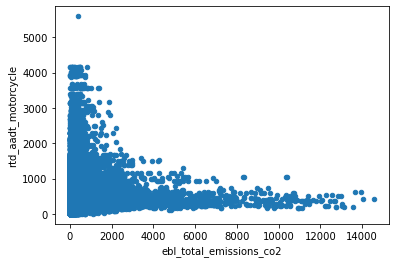

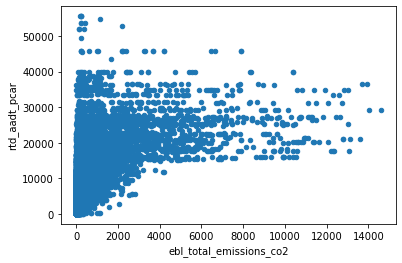

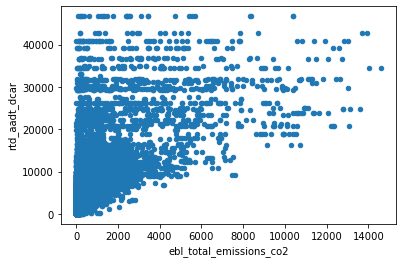

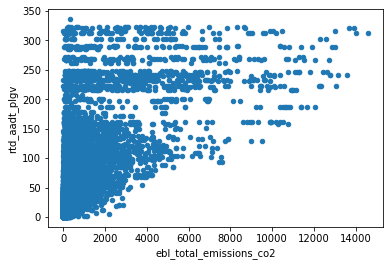

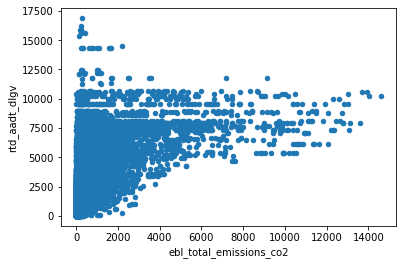

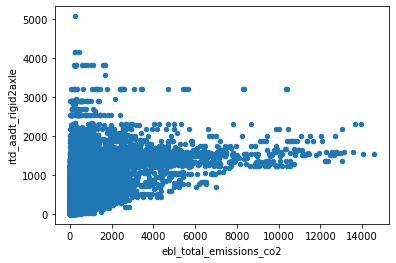

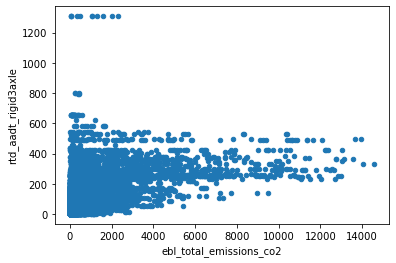

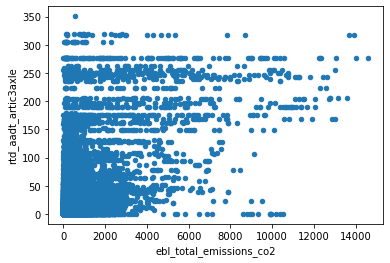

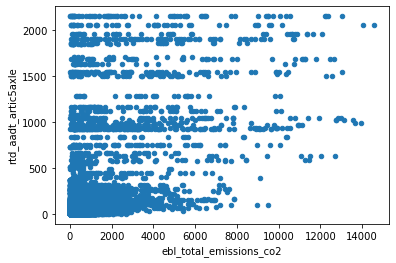

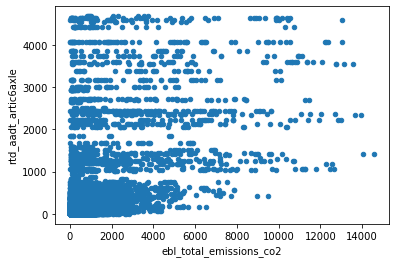

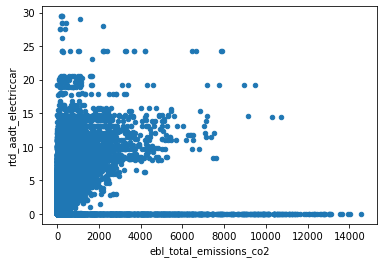

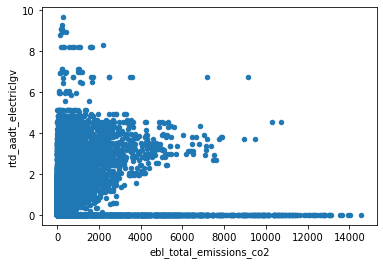

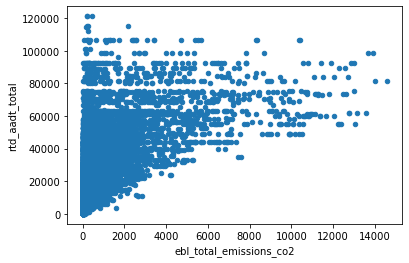

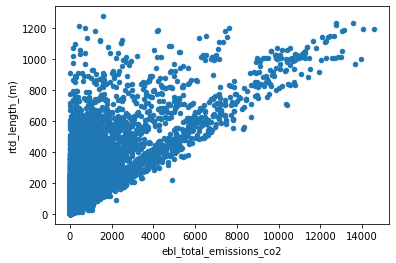

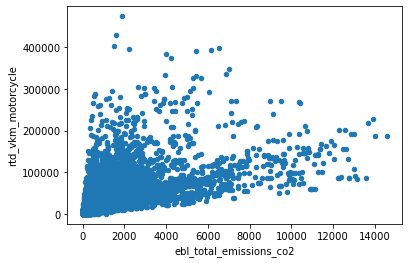

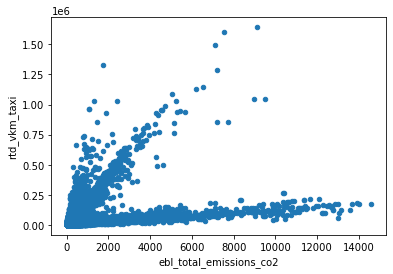

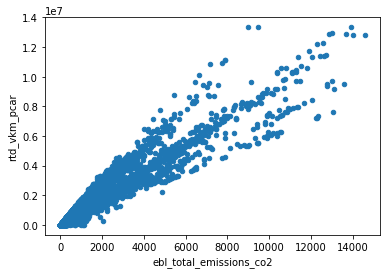

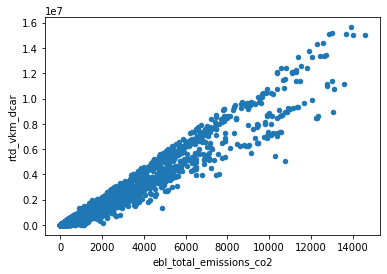

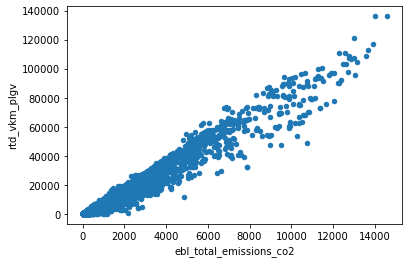

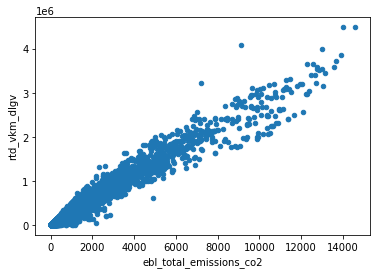

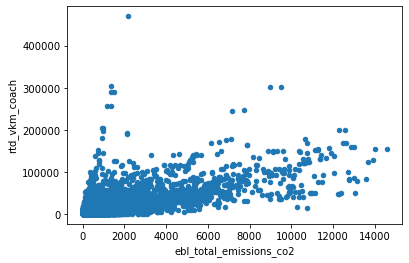

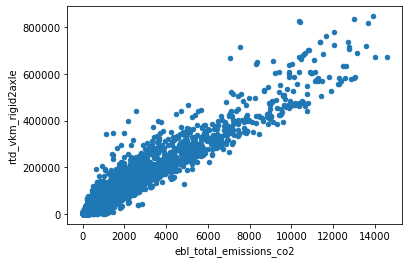

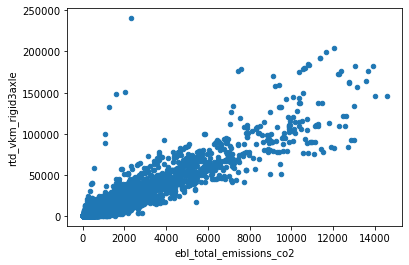

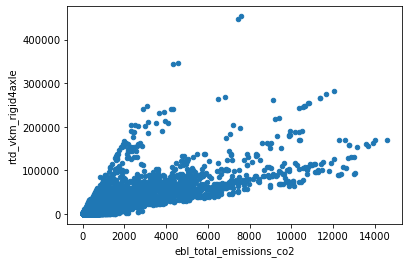

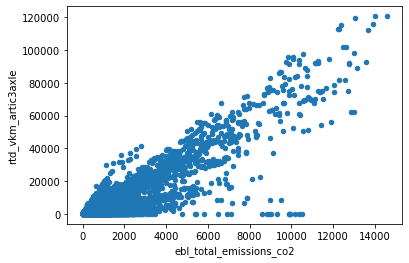

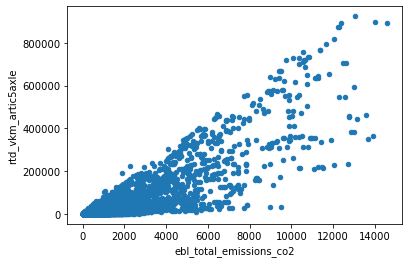

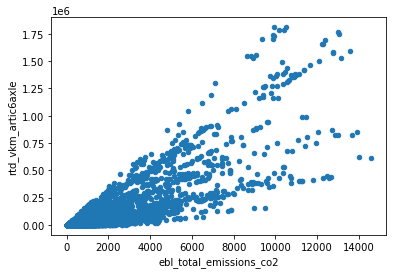

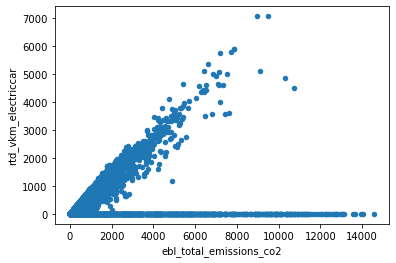

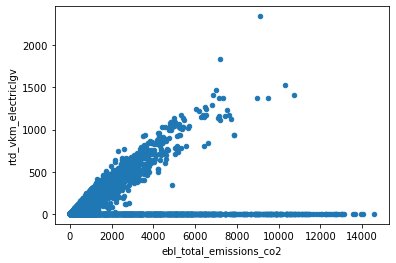

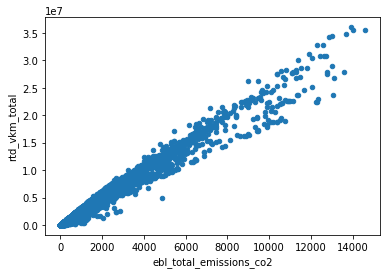

In [475]:
%%time

selected_columns = ['rtd_aadt_motorcycle', 'rtd_aadt_pcar', 'rtd_aadt_dcar', 'rtd_aadt_plgv', 'rtd_aadt_dlgv', 'rtd_aadt_rigid2axle', 'rtd_aadt_rigid3axle', 'rtd_aadt_artic3axle', 'rtd_aadt_artic5axle', 'rtd_aadt_artic6axle', 'rtd_aadt_electriccar', 'rtd_aadt_electriclgv', 'rtd_aadt_total', 'rtd_length_(m)', 'rtd_vkm_motorcycle', 'rtd_vkm_taxi', 'rtd_vkm_pcar', 'rtd_vkm_dcar', 'rtd_vkm_plgv', 'rtd_vkm_dlgv', 'rtd_vkm_coach', 'rtd_vkm_rigid2axle', 'rtd_vkm_rigid3axle', 'rtd_vkm_rigid4axle', 'rtd_vkm_artic3axle', 'rtd_vkm_artic5axle', 'rtd_vkm_artic6axle', 'rtd_vkm_electriccar', 'rtd_vkm_electriclgv', 'rtd_vkm_total']

for c in selected_columns:
    df_processed.plot.scatter("ebl_total_emissions_co2", c)

array([[<AxesSubplot:xlabel='rtd_aadt_motorcycle', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_pcar', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_dcar', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_plgv', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_dlgv', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_rigid2axle', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_rigid3axle', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_artic3axle', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_artic5axle', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_artic6axle', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_electriccar', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_electriclgv', ylabel='rtd_aadt_motorcycle'>,
        <AxesSubplot:xlabel='rtd_aadt_

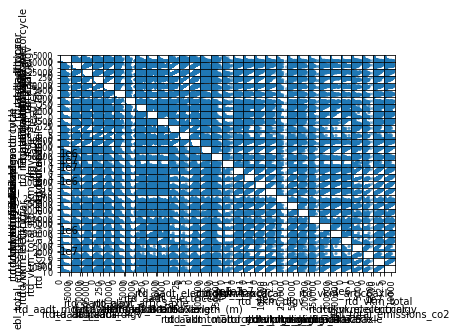

In [330]:
# Scatter Matrix
pd.plotting.scatter_matrix(df_processed[selected_columns + ["ebl_total_emissions_co2"]])

## 8. Train models for link-level data

In [496]:
df_merged_RoadTraffic_Emissions.head()

# Define the selected columns

# X_columns = selected_columns

X_columns = ['rtd_aadt_taxi', 'rtd_aadt_pcar', 'rtd_aadt_dcar', 'rtd_aadt_plgv', 'rtd_aadt_dlgv', 'rtd_aadt_ltbus', 
             'rtd_aadt_coach', 'rtd_aadt_rigid2axle', 'rtd_aadt_rigid3axle', 'rtd_aadt_rigid4axle', 'rtd_aadt_artic3axle',
             'rtd_aadt_artic5axle', 'rtd_aadt_artic6axle', 'rtd_aadt_electriccar', 'rtd_aadt_electriclgv', 'rtd_aadt_total',
             'rtd_speed_(kph)', 'rtd_length_(m)']

# Define the target
y_column = 'ebl_total_emissions_co2'

X = df_processed[X_columns].copy()
y = df_processed[y_column].copy()

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 8.1 Linear Regression

In [497]:
%%time

l_reg = LinearRegression().fit(X_train, y_train)

y_pred_lr = l_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

MSE: 97607.50068156458
RMSE: 312.42199135394515
MAE: 130.12193690506075
R2: 0.7506934209807634
Wall time: 25.4 ms


### 8.2 Decision Tree

In [478]:
%%time

dt_reg = DecisionTreeRegressor().fit(X_train, y_train)

y_pred_dt = dt_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R2:", r2_score(y_test, y_pred_dt))

MSE: 5881.942646778283
RMSE: 76.6938240458662
MAE: 29.723557295856693
R2: 0.9849764926976292
Wall time: 1.8 s


### 8.3 Random Forest

In [430]:
%%time

rf_reg = RandomForestRegressor().fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

MSE: 1760.6470188274293
RMSE: 41.96006457129719
MAE: 10.150116295543443
R2: 0.9956079401975225
Wall time: 538 ms


### 8.4 Support Vector Regression

In [433]:
%%time

sv_reg = SVR().fit(X_train, y_train)

y_pred_sv = sv_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_sv))
print("RMSE:", mean_squared_error(y_test, y_pred_sv, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_sv))
print("R2:", r2_score(y_test, y_pred_sv))

MSE: 343886.3369552186
RMSE: 586.4182269977789
MAE: 147.32559877974737
R2: 0.14215095870373728
Wall time: 2min


### 8.5 Cross-validation

In [ ]:
scores = ["neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error", "r2"]

In [500]:
%%time
# 5-fold cross validation linear regression
cv_results_lr = cross_validate(LinearRegression(), X, y, cv=5, scoring=scores)
print(cv_results_lr)

{'fit_time': array([0.03472781, 0.11940503, 0.02486444, 0.01623964, 0.01764083]), 'score_time': array([0.        , 0.00276709, 0.        , 0.01692748, 0.        ]), 'test_neg_mean_absolute_error': array([-134.99350175, -111.38864307, -143.58551745, -132.30940188,
       -168.69906739]), 'test_neg_mean_squared_error': array([-167222.93457695, -104118.06619302, -196703.5702681 ,
        -45796.01620177,  -87548.66684056]), 'test_neg_root_mean_squared_error': array([-408.92900921, -322.67331187, -443.51276224, -214.00003785,
       -295.88623969]), 'test_r2': array([ 0.73919012,  0.77584721,  0.75826803, -2.5810296 , -3.66482584])}
Wall time: 235 ms


In [501]:
%%time
# 5-fold cross validation decision tree
cv_results_dt = cross_validate(DecisionTreeRegressor(), X, y, cv=5, scoring=scores)
print(cv_results_dt)

{'fit_time': array([0.91114116, 0.89446855, 0.92254305, 0.93397403, 0.92225909]), 'score_time': array([0.        , 0.01012778, 0.01018262, 0.01014662, 0.        ]), 'test_neg_mean_absolute_error': array([-31.76078835, -25.24625058, -30.52508433,  -8.60341569,
        -9.94154973]), 'test_neg_mean_squared_error': array([-13073.16307684,  -6719.74265083, -16085.9713415 ,   -511.15162282,
        -1414.50651891]), 'test_neg_root_mean_squared_error': array([-114.33793367,  -81.97403644, -126.8304827 ,  -22.60866256,
        -37.6099258 ]), 'test_r2': array([0.97961039, 0.98553326, 0.98023171, 0.96003039, 0.92463133])}
Wall time: 4.63 s


In [ ]:
%%time
# 5-fold cross validation random forest
cv_results_rf = cross_validate(RandomForestRegressor(), X, y, cv=5, scoring=scores)
print(cv_results_rf)

In [ ]:
%%time
# 5-fold cross validation svr
cv_results_svr = cross_validate(SVR(), X, y, cv=5, scoring=scores)
print(cv_results_svr)

### 8.6 Hyper-parameter tuning? Regularization, etc.?

### 8.7 Evaluation?